In [2]:
import json
import matplotlib.pyplot as plt

In [25]:
# Load data from JSON file
with open('data.json', 'r') as file:
    data = json.load(file)

    # Extracting data for plottin
    years = list(data.keys())
    months = list(data[years[0]].keys())
    print(months)
    cpi_data = [29.0,28.9,28.9,29.0,29.0,29.1,29.2,29.2,29.3,29.4,29.4,29.4]
    unem_data = []
    fed_data = []
    for year in years:
        for month in months:
            #Check if data[year] has month as a key
            if not month in data[year]:
                break
            cpi_data.append(float(data[year][month]['CPI']))
            unem_data.append(float(data[year][month]['Unemployment']))
            fed_data.append(float(data[year][month]['FedFunds']))
    years = [int(year) for year in years]


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
def getIndexFromYearMonth(year, month):
    #year = int(year)
    month = months.index(month) + 1
    return (year-1960)*12 + month


['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


[29.0, 28.9, 28.9, 29.0, 29.0, 29.1, 29.2, 29.2, 29.3, 29.4, 29.4, 29.4, 29.3, 29.4, 29.4, 29.5, 29.5, 29.6, 29.6, 29.6, 29.6, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8, 30.0, 29.9, 30.0, 30.0, 30.0, 30.0, 30.0, 30.1, 30.1, 30.2, 30.2, 30.2, 30.3, 30.3, 30.4, 30.4, 30.4, 30.4, 30.4, 30.4, 30.5, 30.5, 30.5, 30.6, 30.7, 30.7, 30.7, 30.8, 30.8, 30.9, 30.9, 30.9, 30.9, 30.9, 30.9, 31.0, 31.1, 31.0, 31.1, 31.1, 31.2, 31.2, 31.2, 31.2, 31.3, 31.4, 31.4, 31.6, 31.6, 31.6, 31.6, 31.7, 31.7, 31.8, 31.8, 32.0, 32.1, 32.3, 32.3, 32.4, 32.5, 32.7, 32.7, 32.9, 32.9, 32.9, 32.9, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.1, 34.2, 34.3, 34.4, 34.5, 34.7, 34.9, 35.0, 35.1, 35.3, 35.4, 35.5, 35.6, 35.8, 36.1, 36.3, 36.4, 36.6, 36.8, 37.0, 37.1, 37.3, 37.5, 37.7, 37.8, 38.0, 38.2, 38.5, 38.6, 38.8, 39.0, 39.0, 39.2, 39.4, 39.6, 39.8, 39.8, 39.9, 40.0, 40.1, 40.3, 40.6, 40.7, 40.8, 40.8, 40.9, 40.9, 41.1, 41.1, 41.3, 41.4, 41.5, 41.6, 41.7, 41.9, 42.0, 42.1, 42.3, 42.

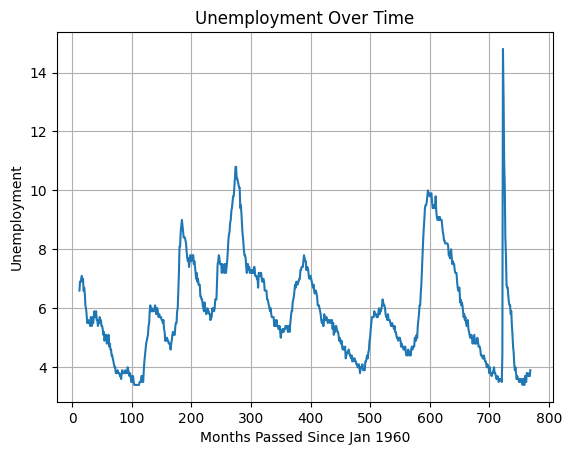

In [29]:
print(cpi_data)
year_start = 1960
month_start = 'Jan'
#months_passed = range(getIndexFromYearMonth(year_start, month_start), len(cpi_data))
months_passed = range(12, len(fed_data))

# Plotting CPI data
plt.plot(months_passed, unem_data[12:], linewidth=1.5)  # marker='o' adds circular markers at data points
plt.title('Unemployment Over Time')
plt.xlabel(f'Months Passed Since {month_start} {year_start}')
plt.ylabel('Unemployment')
plt.grid(True)
plt.show()

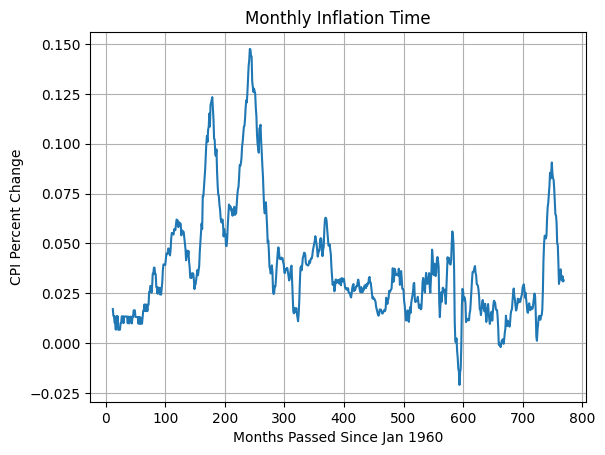

In [30]:

def inflation_12_month(month):
    return (cpi_data[month] - cpi_data[month-12])/cpi_data[month-12]

CPI_monthly = [inflation_12_month(month) for month in range(12, len(cpi_data))]

plt.plot(months_passed, CPI_monthly[12:], linewidth=1.5) 
plt.title('Monthly Inflation Time')
plt.xlabel(f'Months Passed Since {month_start} {year_start}')
plt.ylabel('CPI Percent Change')
plt.grid(True)
plt.show()


In [31]:
#Applying Taylor Model

# rt = 1 + 1.5p_t-1 + .5(u_t–1 – 4)
#1959 Dec Unem: 5.3
#1959 Nov, Dec CPI: 29.4,29.4
taylor_model = []
for i in range(12, len(months_passed)):
    taylor_model.append(1 + 1.5*inflation_12_month(i-1) + 0.5*(unem_data[i-1] - 4))

plt.plot(months_passed, taylor_model, linewidth=1.5, color='r', label='Model')
plt.plot(months_passed, fed_data[12:], linewidth=1.5, color='b', label='Actual') 
plt.title('Fed Funds Model Prediction vs Actual')
plt.xlabel(f'Months Passed Since {month_start} {year_start}')
plt.ylabel('Fed Funds Rate')
plt.legend()
plt.grid(True)
plt.show()

IndexError: list index out of range